# Описание проекта

**Цель:** разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке бурёнок. Модель должна прогнозировать возможный удой у коровы и рассчитывать вероятность получить вкусное молоко от коровы.

**Описание данных**

'ferma_main.csv' - файл содержит данные о стаде фермера на текущий момент.
- id — номер коровы;
- Удой — масса молока, которую корова даёт в год, в килограммах;
- ЭКЕ (Энергетическая кормовая единица) — измерение питательности корма коровы;
- Сырой протеин — содержание сырого протеина в корме, в граммах;
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы;
- Порода — порода коровы;
- Тип пастбища — ландшафт лугов, на которых паслась корова;
- порода папы_быка — порода папы коровы;
- Жирность — содержание жиров в молоке, в процентах;
- Белок — содержание белков в молоке, в процентах;
- Вкус молока — оценка вкуса по личным критериям фермера;
- Возраст — бинарный признак (менее_2_лет, более_2_лет).

'ferma_dad.csv - хранит имя папы каждой коровы в стаде фермера.
- id — номер коровы;
- Имя Папы - имя папы каждой коровы

'cow_buy.csv' - это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.
- Порода — порода коровы;
- Тип пастбища — ландшафт лугов, на которых паслась корова;
- порода папы_быка — порода папы коровы;
- Имя Папы - имя папы каждой коровы;
- Текущая_жирность,% - жирность молока указана на момент покупки — когда «ЭкоФерма» давала им свой корм;
- Текущий_уровень_белок,% - белок в молоке указан на момент покупки — когда «ЭкоФерма» давала им свой корм;
- Возраст — бинарный признак (менее_2_лет, более_2_лет).

#### План работы.

[1. Загрузка и изучение данныx](#section_1)

[2. Предобработка данных](#section_2)

[3. Исследовательский анализ данных](#section_3)

[4. Корреляционный анализ данных](#section_4)

[5. Обучение модели линейной регрессии](#section_5)

[6. Обучение модели логистической регрессии](#section_6)

[7. Итоговые выводы](#section_7)

In [1]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np

In [4]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

sns.set (font_scale= 1)

## 1. Загрузка и изучение данныx
<a id='section_1'></a>

In [5]:
#загрузка данных из файла 'ferma_main.csv'
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')
display(ferma_main.head())
#загрузка данных из файла 'ferma_dad.csv'
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
display(ferma_dad.head())
#загрузка данных из файла 'cow_buy.csv'
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')
display(cow_buy.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [6]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [7]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [8]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [9]:
#переименования столбцов в датафрейме ferma_main
ferma_main = ferma_main.rename (columns= {'Удой, кг': 'milk_yield', 'ЭКЕ (Энергетическая кормовая единица)':\
                                          'energy_feed_unit','Сырой протеин, г': 'crude_protein',\
                                          'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio', 'Порода': 'breed',\
                                          'Тип пастбища': 'type_of_pasture', 'порода папы_быка': 'breed_dad_bull',\
                                          'Жирность,%': 'fat_content', 'Белок,%': 'protein', 'Вкус молока': 'taste_milk',\
                                          'Возраст': 'age'})
#переименования столбцов в датафрейме ferma_dad
ferma_dad = ferma_dad.rename (columns= {'Имя Папы': 'name_dad'})
#переименования столбцов в датафрейме cow_buy
cow_buy = cow_buy.rename (columns= {'Порода': 'breed', 'Тип пастбища': 'type_of_pasture', 'порода папы_быка': 'breed_dad_bull',\
                                    'Имя_папы': 'name_dad', 'Текущая_жирность,%': 'current_fat_content',\
                                    'Текущий_уровень_белок,%': 'сurrent_protein_level', 'Возраст': 'age'})

In [10]:
ferma_main.columns

Index(['id', 'milk_yield', 'energy_feed_unit', 'crude_protein',
       'sugar_protein_ratio', 'breed', 'type_of_pasture', 'breed_dad_bull',
       'fat_content', 'protein', 'taste_milk', 'age'],
      dtype='object')

In [11]:
ferma_dad.columns

Index(['id', 'name_dad'], dtype='object')

In [12]:
cow_buy.columns

Index(['breed', 'type_of_pasture', 'breed_dad_bull', 'name_dad',
       'current_fat_content', 'сurrent_protein_level', 'age'],
      dtype='object')

**Вывод:** На первый взгляд в данных нет пропусков, нужно будет изменить тип данных в некоторых столбцах. Также для удобства столбцы в датафреймах были переименованы.

## 2. Предобработка данных
<a id='section_2'></a>

Заменим запятую на точку в столбцах 'energy_feed_unit', 'sugar_protein_ratio', 'fat_content', 'protein' датафрейма ferma_main и тип данных на float.
Заменим запятую на точку в столбцах 'current_fat_content', 'сurrent_protein_level' датафрейма cow_buy и тип данных на float.

In [13]:
for i in range(len(ferma_main['energy_feed_unit'])):
    ferma_main['energy_feed_unit'].values [i] = ferma_main['energy_feed_unit'].values [i].replace(',', '.')
    ferma_main['sugar_protein_ratio'].values [i] = ferma_main['sugar_protein_ratio'].values [i].replace(',', '.')
    ferma_main['fat_content'].values [i] = ferma_main['fat_content'].values [i].replace(',', '.')
    ferma_main['protein'].values [i] = ferma_main['protein'].values [i].replace(',', '.')

In [14]:
ferma_main['energy_feed_unit'] = ferma_main['energy_feed_unit'].astype('float')
ferma_main['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].astype('float')
ferma_main['fat_content'] = ferma_main['fat_content'].astype('float')
ferma_main['protein'] = ferma_main['protein'].astype('float')

In [15]:
for i in range(len(cow_buy['current_fat_content'])):
    cow_buy['current_fat_content'].values [i] = cow_buy['current_fat_content'].values [i].replace(',', '.')
    cow_buy['сurrent_protein_level'].values [i] = cow_buy['сurrent_protein_level'].values [i].replace(',', '.')

In [16]:
cow_buy['current_fat_content'] = cow_buy['current_fat_content'].astype('float')
cow_buy['сurrent_protein_level'] = cow_buy['сurrent_protein_level'].astype('float')

In [17]:
ferma_main.head()

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,type_of_pasture,breed_dad_bull,fat_content,protein,taste_milk,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [18]:
ferma_main.duplicated().sum()

5

In [19]:
ferma_dad.duplicated().sum()

0

In [20]:
cow_buy.duplicated().sum()

4

При проверке обнаружено 5 дупликатов в датафрейме ferma_main и 4 дупликата в датафрейме cow_buy. Избавимся от дупликатов в датафрейме ferma_main.

In [21]:
ferma_main = ferma_main.drop_duplicates()

In [22]:
#cow_buy = cow_buy.drop_duplicates()

In [23]:
ferma_main.duplicated().sum()

0

Явные дупликаты удалены.

In [24]:
print("Уникальные значения столбца 'breed'",'\n', cow_buy['breed'].unique())
print("Уникальные значения столбца 'type_of_pasture'",'\n', cow_buy['type_of_pasture'].unique())
print("Уникальные значения столбца 'breed_dad_bull'",'\n', cow_buy['breed_dad_bull'].unique())
print("Уникальные значения столбца 'name_dad'",'\n', cow_buy['name_dad'].unique())
print("Уникальные значения столбца 'age'",'\n', cow_buy['age'].unique())

Уникальные значения столбца 'breed' 
 ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения столбца 'type_of_pasture' 
 ['холмистое' 'равнинное']
Уникальные значения столбца 'breed_dad_bull' 
 ['Айдиал' 'Соверин']
Уникальные значения столбца 'name_dad' 
 ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Уникальные значения столбца 'age' 
 ['более_2_лет' 'менее_2_лет']


In [25]:
print("Уникальные значения столбца 'breed'",'\n', ferma_main['breed'].unique())
print("Уникальные значения столбца 'type_of_pasture'",'\n', ferma_main['type_of_pasture'].unique())
print("Уникальные значения столбца 'breed_dad_bull'",'\n', ferma_main['breed_dad_bull'].unique())
print("Уникальные значения столбца 'taste_milk'",'\n', ferma_main['taste_milk'].unique())
print("Уникальные значения столбца 'age'",'\n', ferma_main['age'].unique())

Уникальные значения столбца 'breed' 
 ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения столбца 'type_of_pasture' 
 ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения столбца 'breed_dad_bull' 
 ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения столбца 'taste_milk' 
 ['вкусно' 'не вкусно']
Уникальные значения столбца 'age' 
 ['более_2_лет' 'менее_2_лет']


В датафрейме ferma_main найдены неявные дупликаты в столбце 'type_of_pasture' *'Равнинное' 'Равнинные'*, а в столбце 'breed_dad_bull' *'Айдиал' 'Айдиалл'*. В столбце 'type_of_pasture' заменим значения 'Равнинные' на 'Равнинное' и приведу к нижнему регистру, чтобы значения соответствовали значениям столбца 'type_of_pasture' в датафрейме cow_buy. В столбце 'breed_dad_bull' заменим значения 'Айдиалл' на 'Айдиал'.

In [26]:
ferma_main.loc[ferma_main['breed_dad_bull'] == 'Айдиалл', 'breed_dad_bull'] = 'Айдиал'
ferma_main.loc[ferma_main['type_of_pasture'] == 'Равнинные', 'type_of_pasture'] = 'Равнинное'
ferma_main['type_of_pasture'] = ferma_main['type_of_pasture'].str.lower()
print("Уникальные значения столбца 'type_of_pasture'",'\n', ferma_main['type_of_pasture'].unique())
print("Уникальные значения столбца 'breed_dad_bull'",'\n', ferma_main['breed_dad_bull'].unique())

Уникальные значения столбца 'type_of_pasture' 
 ['равнинное' 'холмистое']
Уникальные значения столбца 'breed_dad_bull' 
 ['Айдиал' 'Соверин']


Избавились от неявных дупликатов в датафрейме ferma_main. Теперь снова проведём проверку на явные дупликаты.

In [27]:
ferma_main.duplicated().sum()

0

Явные дупликаты отсутствуют.

Проведём проверку датафреймов на наличие пропусков.

In [28]:
ferma_main.isna().sum()

id                     0
milk_yield             0
energy_feed_unit       0
crude_protein          0
sugar_protein_ratio    0
breed                  0
type_of_pasture        0
breed_dad_bull         0
fat_content            0
protein                0
taste_milk             0
age                    0
dtype: int64

In [29]:
report = ferma_main.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / ferma_main.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
id,0,0.0
milk_yield,0,0.0
energy_feed_unit,0,0.0
crude_protein,0,0.0
sugar_protein_ratio,0,0.0
breed,0,0.0
type_of_pasture,0,0.0
breed_dad_bull,0,0.0
fat_content,0,0.0
protein,0,0.0


In [30]:
ferma_main.isnull().sum()*100/len(ferma_main)

id                     0.0
milk_yield             0.0
energy_feed_unit       0.0
crude_protein          0.0
sugar_protein_ratio    0.0
breed                  0.0
type_of_pasture        0.0
breed_dad_bull         0.0
fat_content            0.0
protein                0.0
taste_milk             0.0
age                    0.0
dtype: float64

In [31]:
ferma_dad.isna().sum()

id          0
name_dad    0
dtype: int64

In [32]:
cow_buy.isna().sum()

breed                    0
type_of_pasture          0
breed_dad_bull           0
name_dad                 0
current_fat_content      0
сurrent_protein_level    0
age                      0
dtype: int64

В данных отсутствуют пропуски.

**Вывод** 
- В данных отсутствуют пропуски;
- Были удалены явные дупликаты в датафреймах ferma_main, cow_buy;
- Были обнаружены и устранены неявные дупликаты в датафрейме ferma_main в столбцах 'type_of_pasture', 'breed_dad_bull';
- В датафрейме ferma_main в столбцах 'energy_feed_unit', 'sugar_protein_ratio', 'fat_content', 'protein' преобразовали тип данных на float;
- В датафрейме cow_buy в столбцах 'current_fat_content', 'сurrent_protein_level' преобразовали тип данных на float;

## 3. Исследовательский анализ данных
<a id='section_3'></a>

In [33]:
ferma_main.describe()

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,fat_content,protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Максимальный удой 45616 в год выглядит очень не правдоподобно, скорее всего это выброс. Остальные данные выглядят нормально.

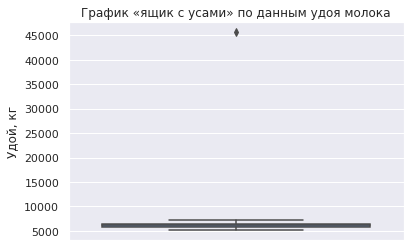

In [34]:
ax = sns.boxplot(data = ferma_main, y = 'milk_yield')
ax.set_title('График «ящик с усами» по данным удоя молока')
ax.set_ylabel('Удой, кг')
plt.show()

Удалим выброс.

In [35]:
ferma_main = ferma_main[ferma_main['milk_yield'] != ferma_main['milk_yield'].max()]

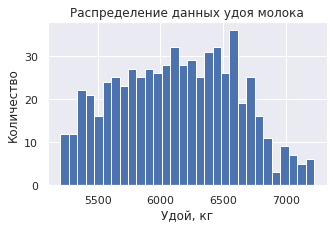

In [36]:
ferma_main['milk_yield'].plot(kind = 'hist', bins = 30, figsize = (5, 3))
plt.title('Распределение данных удоя молока')
plt.xlabel('Удой, кг')
plt.ylabel('Количество')
plt.show()

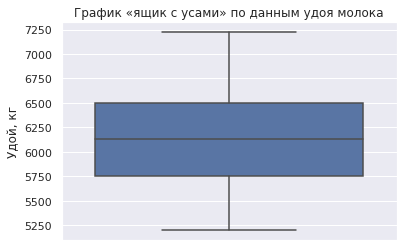

In [37]:
ax = sns.boxplot(data = ferma_main, y = 'milk_yield')
ax.set_title('График «ящик с усами» по данным удоя молока')
ax.set_ylabel('Удой, кг')
plt.show()

Судя по представленным графикам значения удоя варьируются приблизительно от 5250 до 7250 кг. Наибольшее количество значений приходится на интервал 6500-6750 кг, где количество наблюдений достигает примерно 35. Значения удоя в интервале 5750-6250 кг также достаточно часты, с количеством наблюдений около 20-25. Меньше всего значений в интервалах около 5250-5500 кг и 7000-7250 кг, где количество наблюдений меньше 10. Наблюдается постепенное уменьшение количества наблюдений после пика в интервале 6500-6750 кг. При этом стоит заметить, что распределение нессеметрично.


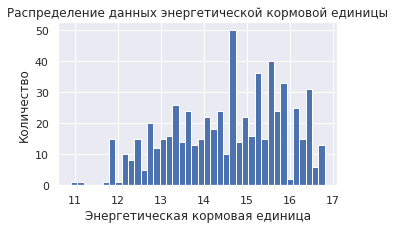

In [38]:
ferma_main['energy_feed_unit'].plot(kind = 'hist', bins = 40, figsize = (5, 3))
plt.title('Распределение данных энергетической кормовой единицы')
plt.xlabel('Энергетическая кормовая единица')
plt.ylabel('Количество')
plt.show()

Судя по гистограмме распределения данных энергетической кормовой единицы пик значений приходится на интервал между 14 и 15. При этом распределение несимметрично с большим количеством наблюдений между 13 и 17.

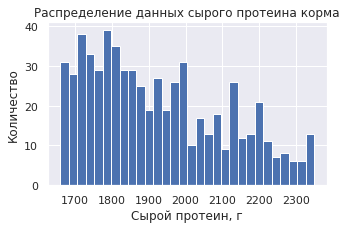

In [39]:
ferma_main['crude_protein'].plot(kind = 'hist', bins = 30, figsize = (5, 3))
plt.title('Распределение данных сырого протеина корма')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Количество')
plt.show()

Судя по гистограмме распределения данных сырого протеина корма коровы пиковое значение приходится на интервал 1700-1800. Распределение несимметричное с большим количеством наблюдений на интервале 1670-2000.

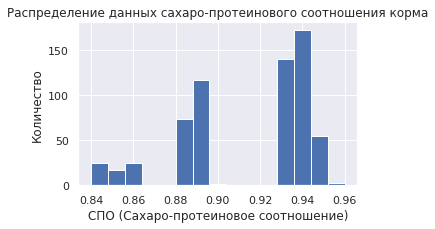

In [40]:
ferma_main['sugar_protein_ratio'].plot(kind = 'hist', bins = 15, figsize = (5, 3))
plt.title('Распределение данных сахаро-протеинового соотношения корма')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Количество')
plt.show()

Судя по гистограмме расределения данных сахаро-протеинового соотношения есть 3 вида корма, используемые для питания коров. Первый вид имеет сахаро-протеиновое соотношение в районе 0,84-0,865, второй вид имеет соотношение от 0,88 до 0,905, а третий вид имеет соотношение от 0,93 до 0,96. Распределение несимметричное с 3 пиками.

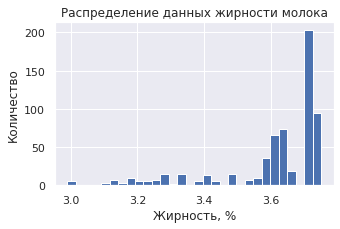

In [41]:
ferma_main['fat_content'].plot(kind = 'hist', bins = 30, figsize = (5, 3))
plt.title('Распределение данных жирности молока')
plt.xlabel('Жирность, %')
plt.ylabel('Количество')
plt.show()

Судя по гистограмме жирность молока варьируется от 3 до 3.7%. Чаще всего молоко имеет жирность 3.6 - 3.7%.

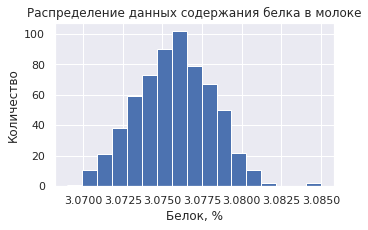

In [42]:
ferma_main['protein'].plot(kind = 'hist', bins = 17, figsize = (5, 3))
plt.title('Распределение данных содержания белка в молоке')
plt.xlabel('Белок, %')
plt.ylabel('Количество')
plt.show()

Гистограмма с распределением данных содержания белка в молоке с пиком на уровне 3.076.

In [43]:
ferma_main

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,type_of_pasture,breed_dad_bull,fat_content,protein,taste_milk,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


Создадим датасет с названиями для каждого столбца датасета ferma_main, которые будем использовать для графиков.

In [44]:
name = [0, 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода', 'Тип пастбища', 'Порода папы быка', 'Жирность,%', 'Белок,%', 'Вкус молока', 'Возраст']
columns_name = list(ferma_main.columns)
data_name = pd.DataFrame(
    {'columns_name': columns_name,
     'name': name})

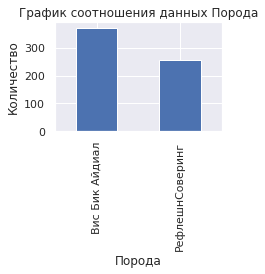

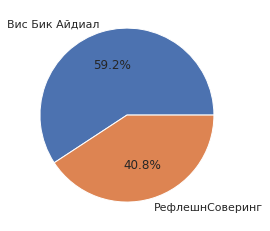

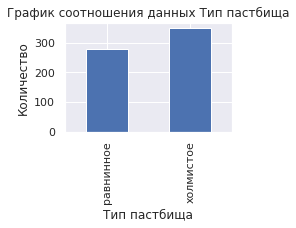

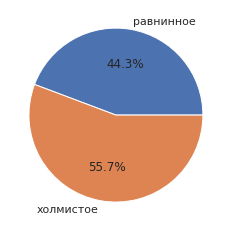

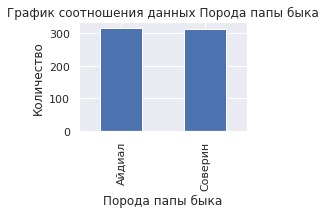

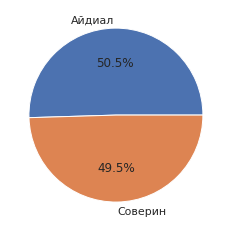

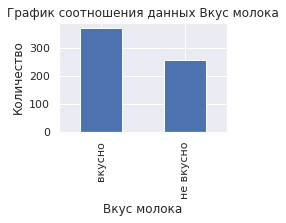

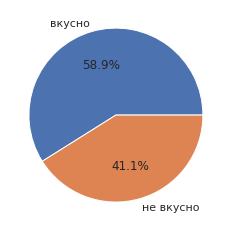

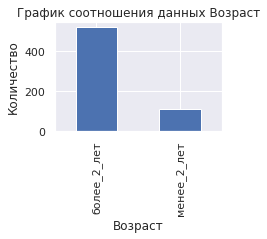

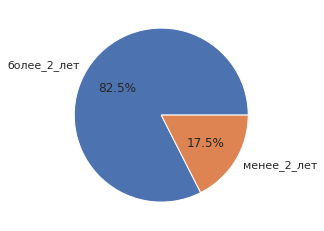

In [45]:
for name, value in ferma_main.iteritems():
    if value.dtype == 'object':
        ferma_main.groupby(name)[name].count().plot(kind = 'bar', figsize = (3, 2))
        n = data_name[data_name['columns_name'] == name]['name'].iat[0]
        plt.title('График соотношения данных ' + n)
        plt.xlabel(n)
        plt.ylabel('Количество')
        plt.show()
        ferma_main.groupby(name)[name].count().plot(kind = 'pie', figsize = (4, 4), autopct='%1.1f%%')
        plt.ylabel('')
        plt.show()

Рассмотрим датасет *cow_boy*.

In [46]:
cow_buy.describe()

,current_fat_content,сurrent_protein_level
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


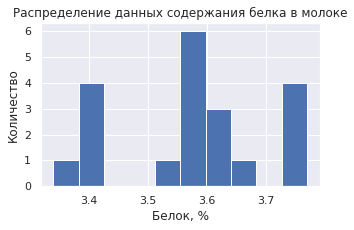

In [47]:
cow_buy['current_fat_content'].plot(kind = 'hist', figsize = (5, 3))
plt.title('Распределение данных содержания белка в молоке')
plt.xlabel('Белок, %')
plt.ylabel('Количество')
plt.show()

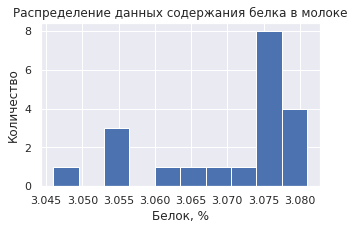

In [48]:
cow_buy['сurrent_protein_level'].plot(kind = 'hist', figsize = (5, 3))
plt.title('Распределение данных содержания белка в молоке')
plt.xlabel('Белок, %')
plt.ylabel('Количество')
plt.show()

Создадим датасет с названиями для каждого столбца датасета cow_buy, которые будем использовать для графиков.

In [49]:
name_cow_buy = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Имя папы быка', 'Жирность,%', 'Белок,%', 'Возраст']
columns_cow_buy = list(cow_buy.columns)
data_name_cow_buy = pd.DataFrame(
    {'columns_name': columns_cow_buy,
     'name': name_cow_buy})

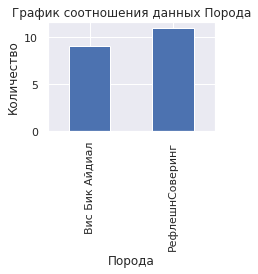

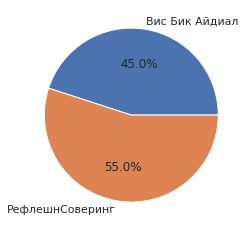

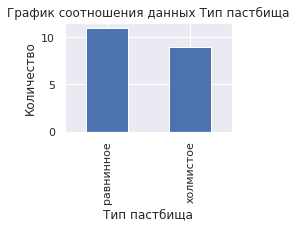

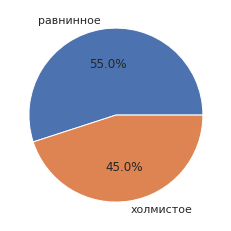

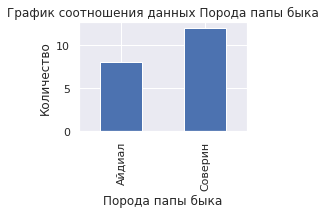

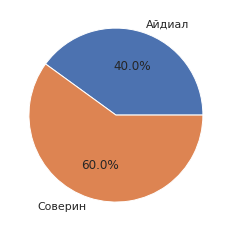

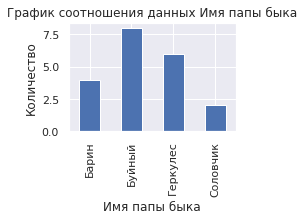

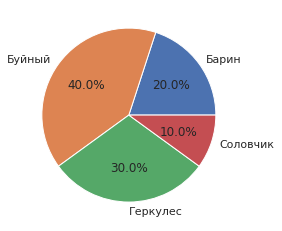

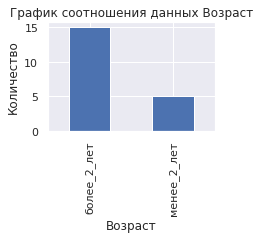

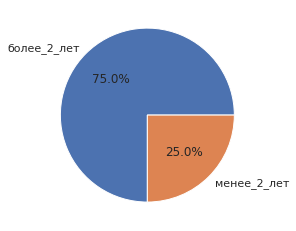

In [50]:
for name, value in cow_buy.iteritems():
    if value.dtype == 'object':
        cow_buy.groupby(name)[name].count().plot(kind = 'bar', figsize = (3, 2))
        n = data_name_cow_buy[data_name_cow_buy['columns_name'] == name]['name'].iat[0]
        plt.title('График соотношения данных ' + n)
        plt.xlabel(n)
        plt.ylabel('Количество')
        plt.show()
        cow_buy.groupby(name)[name].count().plot(kind = 'pie', figsize = (4, 4), autopct='%1.1f%%')
        plt.ylabel('')
        plt.show()

**Вывод** 

Был проведён исследовательский анализ по датафрейму ferma_main. В результате:
- Был обнаружен и удален выброс в столбце 'milk_yield';
- Были сделаны следующие выводы по графикам: 
  - Наибольшее количество значений удоя коров приходится на интервал 6500-6750 кг, где количество наблюдений достигает примерно 35;
  - Судя по гистограмме распределения данных энергетической кормовой единицы пик значений приходится на интервал между 14 и 15;
  - Судя по гистограмме распределения данных сырого протеина корма коровы пиковое значение приходится на интервал 1700-1800;
  - Судя по гистограмме расределения данных сахаро-протеинового соотношения есть 3 вида корма, используемые для питания коров. Первый вид имеет сахаро-протеиновое соотношение в районе 0,84-0,865, второй вид имеет соотношение от 0,88 до 0,905, а третий вид имеет соотношение от 0,93 до 0,96;
  - Судя по гистограмме жирность молока варьируется от 3 до 3.7%. Чаще всего молоко имеет жирность 3.6 - 3.7%;
  - Гистограмма с распределением данных содержания белка в молоке имеет форму нормального распределения с пиком на уровне 3.076;
  - Все категориальные признаки имеют соотношение примерно равное 1:1, кроме возраста (коров в возрасте меньше 2 лет значительно меньше, чем коров старше 2 лет);

Был проведен исследовательский анализ по датафрейму cow_buy. В результате выбросы и аномальные значения не были обнаружены.

## 4. Корреляционный анализ
<a id='section_4'></a>

Матрица корреляции для количественных признаков.

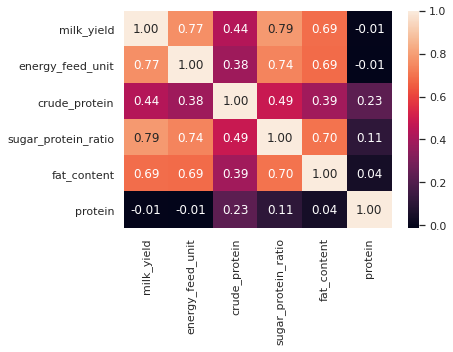

In [51]:
sns.heatmap(ferma_main.loc[:, ['milk_yield', 'energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat_content',\
                               'protein']].corr(method='spearman'), annot=True, fmt='.2f')
plt.show()

Матрица корреляции для всех признаков (количественных и категориальных).

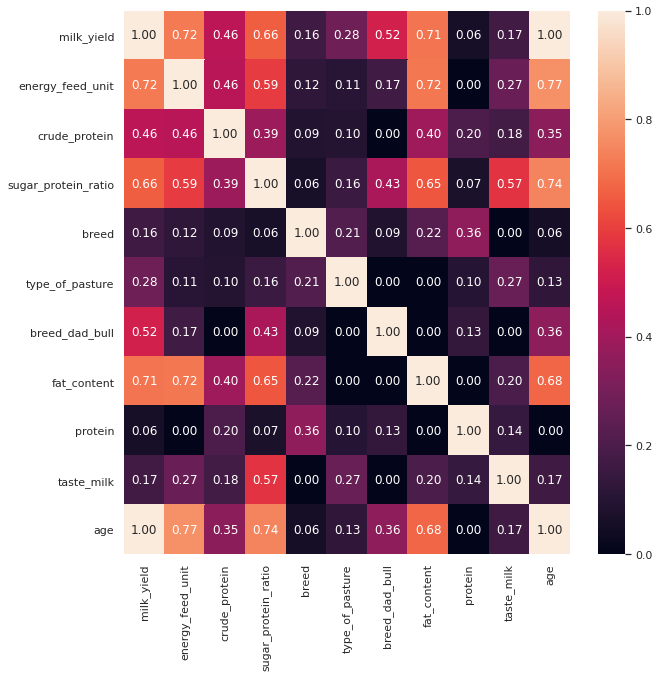

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
ferma_main_without_id = ferma_main.drop(columns=['id'])
sns.heatmap(ferma_main_without_id.phik_matrix(interval_cols = ['milk_yield', 'energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat_content', 'protein']), annot=True, fmt='.2f')
plt.show()

Так как в датасете ferma_main присутствуют категориальные признаки стоит использовать коэффициент корреляции ФИ.

Судя по матрице корреляции удой молока коровы коррелирует с возрастом коровы (коэффициент ФИ **1.00**), содержанием жира в молоке (коэффициент Спирмена **0.60**, коэффициент ФИ **0.71**), сахаро-протеиновым соотношением (коэффициент Спирмена **0.81**, коэффициент ФИ **0.66**), энергетической кормовой единицей (коэффициент Спирмена **0.77**, коэффициент ФИ **0.72**).

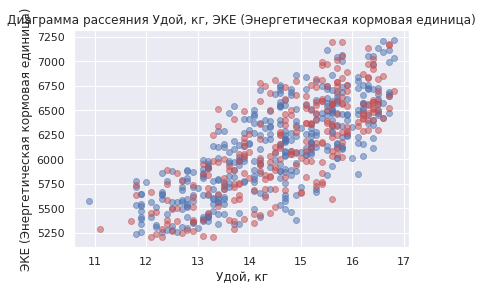

Порода
Красные точки:  Вис Бик Айдиал
Коэффициент корреляции:  0.7668580723024951
Cиние точки:  РефлешнСоверинг
Коэффициент корреляции:  0.7550340516299208


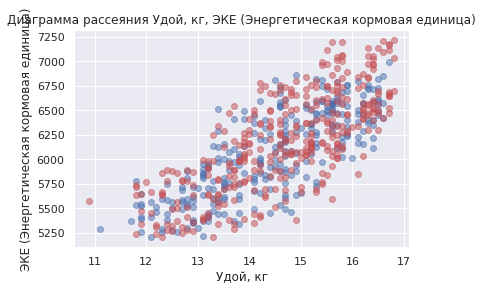

Тип пастбища
Красные точки:  равнинное
Коэффициент корреляции:  0.7851594648581199
Cиние точки:  холмистое
Коэффициент корреляции:  0.7452489851288182


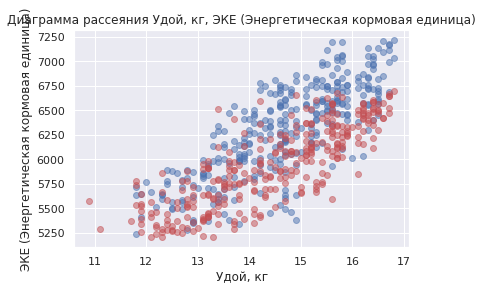

Порода папы быка
Красные точки:  Айдиал
Коэффициент корреляции:  0.7813334530563042
Cиние точки:  Соверин
Коэффициент корреляции:  0.8237103734945846


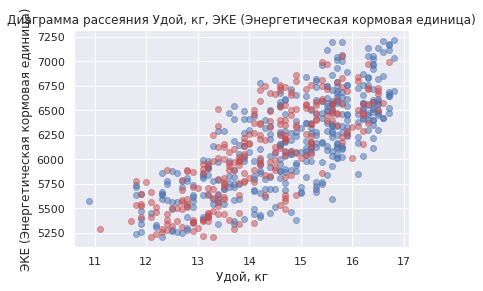

Вкус молока
Красные точки:  вкусно
Коэффициент корреляции:  0.7546687558085633
Cиние точки:  не вкусно
Коэффициент корреляции:  0.7945650448710853


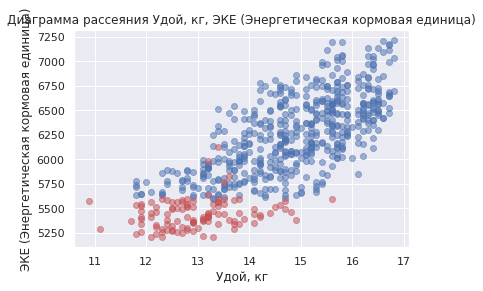

Возраст
Красные точки:  более_2_лет
Коэффициент корреляции:  0.6672234962349385
Cиние точки:  менее_2_лет
Коэффициент корреляции:  0.24807854684404326


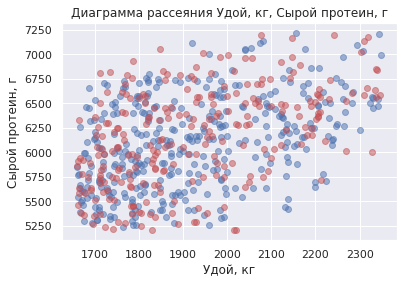

Порода
Красные точки:  Вис Бик Айдиал
Коэффициент корреляции:  0.41003127573177534
Cиние точки:  РефлешнСоверинг
Коэффициент корреляции:  0.48325505502647786


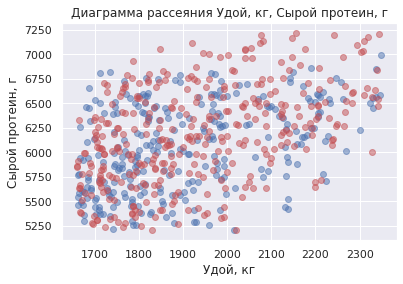

Тип пастбища
Красные точки:  равнинное
Коэффициент корреляции:  0.40495577995105203
Cиние точки:  холмистое
Коэффициент корреляции:  0.45978661149575917


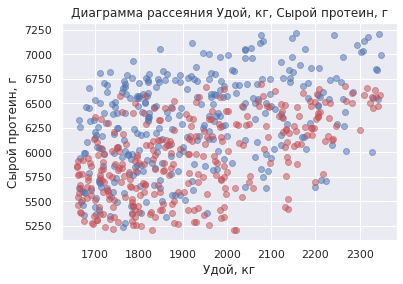

Порода папы быка
Красные точки:  Айдиал
Коэффициент корреляции:  0.42294279070485025
Cиние точки:  Соверин
Коэффициент корреляции:  0.5296573140563555


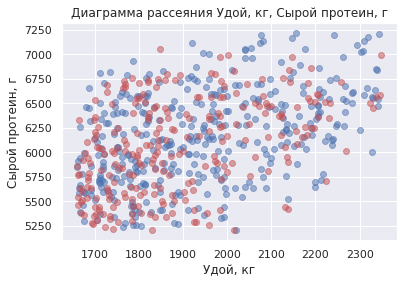

Вкус молока
Красные точки:  вкусно
Коэффициент корреляции:  0.42656785297655014
Cиние точки:  не вкусно
Коэффициент корреляции:  0.43807695527304563


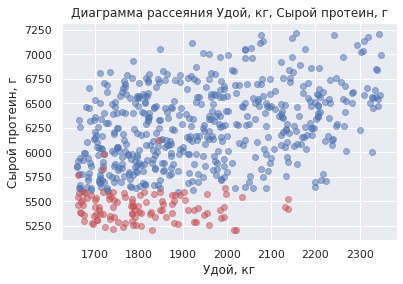

Возраст
Красные точки:  более_2_лет
Коэффициент корреляции:  0.3689905723892645
Cиние точки:  менее_2_лет
Коэффициент корреляции:  -0.08580671340739619


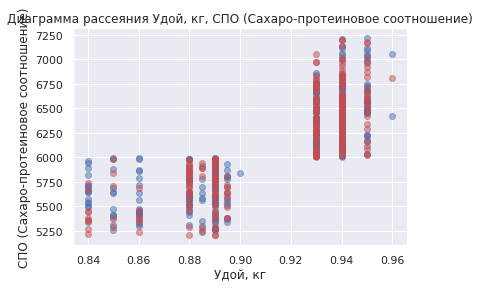

Порода
Красные точки:  Вис Бик Айдиал
Коэффициент корреляции:  0.7924885319609954
Cиние точки:  РефлешнСоверинг
Коэффициент корреляции:  0.7744109144488501


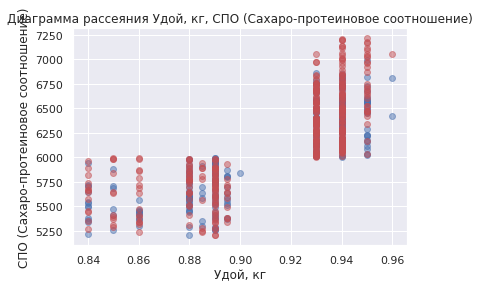

Тип пастбища
Красные точки:  равнинное
Коэффициент корреляции:  0.8096374810484434
Cиние точки:  холмистое
Коэффициент корреляции:  0.7735108857697659


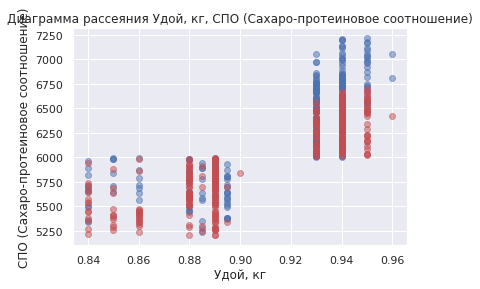

Порода папы быка
Красные точки:  Айдиал
Коэффициент корреляции:  0.7588292634492234
Cиние точки:  Соверин
Коэффициент корреляции:  0.8168186298082608


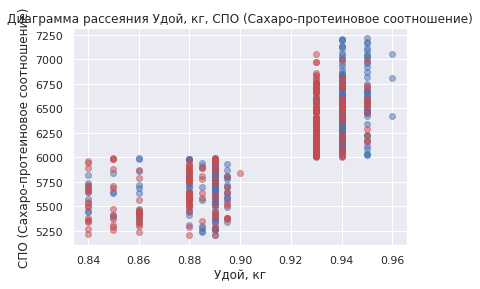

Вкус молока
Красные точки:  вкусно
Коэффициент корреляции:  0.7909059224149286
Cиние точки:  не вкусно
Коэффициент корреляции:  0.7989510484406205


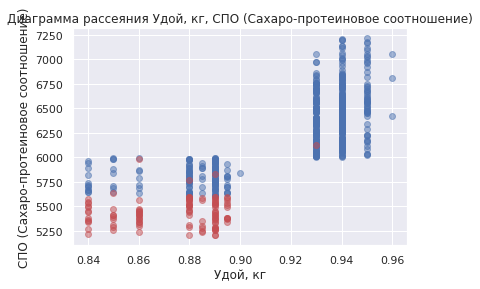

Возраст
Красные точки:  более_2_лет
Коэффициент корреляции:  0.7023862852476301
Cиние точки:  менее_2_лет
Коэффициент корреляции:  0.08760879211046527


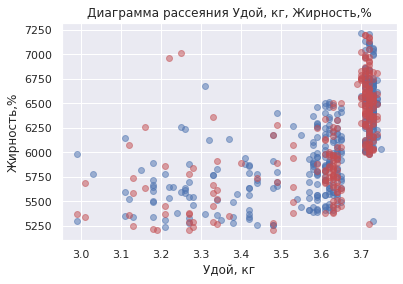

Порода
Красные точки:  Вис Бик Айдиал
Коэффициент корреляции:  0.711751350660175
Cиние точки:  РефлешнСоверинг
Коэффициент корреляции:  0.6442686607587559


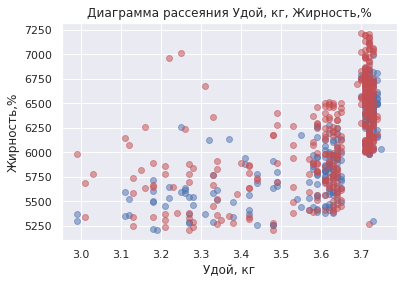

Тип пастбища
Красные точки:  равнинное
Коэффициент корреляции:  0.7833160873993076
Cиние точки:  холмистое
Коэффициент корреляции:  0.6270971299522784


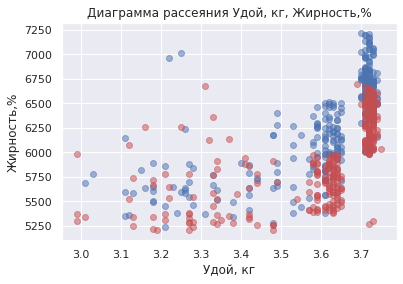

Порода папы быка
Красные точки:  Айдиал
Коэффициент корреляции:  0.7301289185158868
Cиние точки:  Соверин
Коэффициент корреляции:  0.7336970913289004


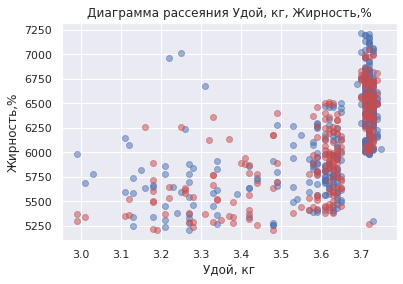

Вкус молока
Красные точки:  вкусно
Коэффициент корреляции:  0.6521386238815483
Cиние точки:  не вкусно
Коэффициент корреляции:  0.7218661062456412


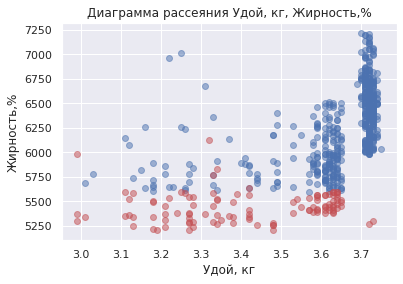

Возраст
Красные точки:  более_2_лет
Коэффициент корреляции:  0.5891712329372263
Cиние точки:  менее_2_лет
Коэффициент корреляции:  0.24422271984627628


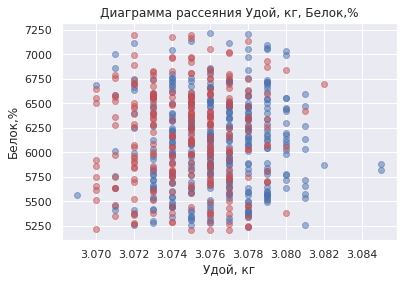

Порода
Красные точки:  Вис Бик Айдиал
Коэффициент корреляции:  0.02424972649516725
Cиние точки:  РефлешнСоверинг
Коэффициент корреляции:  0.00878696761557842


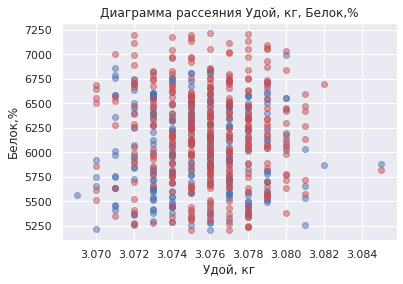

Тип пастбища
Красные точки:  равнинное
Коэффициент корреляции:  0.006500869119212042
Cиние точки:  холмистое
Коэффициент корреляции:  -0.03436458560075415


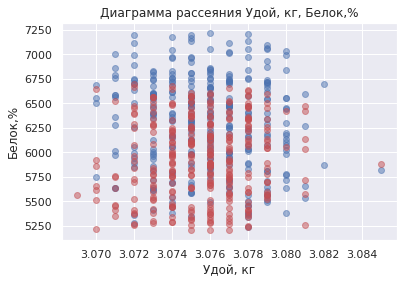

Порода папы быка
Красные точки:  Айдиал
Коэффициент корреляции:  -0.09642820226006837
Cиние точки:  Соверин
Коэффициент корреляции:  0.06388954245990226


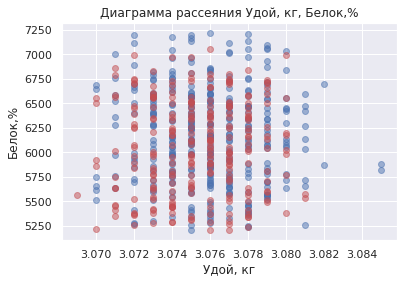

Вкус молока
Красные точки:  вкусно
Коэффициент корреляции:  -0.057604414207313284
Cиние точки:  не вкусно
Коэффициент корреляции:  0.0379410871831345


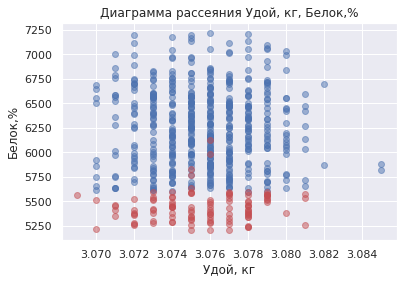

Возраст
Красные точки:  более_2_лет
Коэффициент корреляции:  -0.018970127090033703
Cиние точки:  менее_2_лет
Коэффициент корреляции:  0.1319864840937245


In [53]:
for name, values in ferma_main.iteritems():
    if (values.dtype == 'int' or values.dtype == 'float64') and name != 'id' and name != 'milk_yield':
        for name2, values2 in ferma_main.iteritems():
            if values2.dtype == 'object':
                u = values2.unique()
                c = ferma_main[ferma_main[name2] == u[0]]
                plt.scatter(c[name], c['milk_yield'], color ='b', alpha=0.5)
                b = ferma_main[ferma_main[name2] == u[1]]
                plt.scatter(b[name], b['milk_yield'], color = 'r', alpha=0.5)
                n = data_name[data_name['columns_name'] == name]['name'].iat[0]
                plt.title('Диаграмма рассеяния Удой, кг' + ', ' + n)
                plt.xlabel('Удой, кг')
                plt.ylabel(n)
                plt.show()
                print(data_name[data_name['columns_name'] == name2]['name'].iat[0])
                print('Красные точки: ', u[0])
                print('Коэффициент корреляции: ', c['milk_yield'].corr(c[name], method='spearman'))
                print('Cиние точки: ', u[1])
                print('Коэффициент корреляции: ', b['milk_yield'].corr(b[name], method='spearman'))

**Вывод**

Шкала Чеддока.

Слабая связь — от 0,1 до 0,3.

Умеренная связь — от 0,3 до 0,5.

Заметная связь — от 0,5 до 0,7.

Высокая связь — от 0,7 до 0,9.

Очень высокая (сильная) связь — от 0,9 до 1,0.

- Для предсказания выбраны все признаки, кроме содержания жира и белка в молоке, так как эти признаки не оказывают влияния на количество удоя, в отличие от качества корма родителей бурёнки и их породы.
- Также стоит отметить, что диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориального признака возраста коров показывают, что корреляции почти нет при возрасте коров менее 2 лет, а у коров в возрасте более 2 лет корреляция есть.
- Между входными признаками отсутствует мультиколлинеарность (при значении коэффициента корреляции от 0.9 до 0.95 по модулю).

## 5. Обучение модели линейной регрессии
<a id='section_5'></a>

Разработка и обучение первой модели.

In [54]:
X = ferma_main[['energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'breed_dad_bull', 'breed',\
                'type_of_pasture', 'age']]
y = ferma_main['milk_yield']
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state = RANDOM_STATE)

In [55]:
# кодирование категориального признака
encoder  = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['breed', 'type_of_pasture', 'age', 'breed_dad_bull']

# обучение и преобразование категориального признака из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# обучение и преобразование категориального признака из тестовой выборки 
X_test_ohe = encoder.transform(X_test[cat_col_names])

# сохранение в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names_out()

In [56]:
num_col_names = ['energy_feed_unit', 'crude_protein', 'sugar_protein_ratio']

# выбор метода масштабирования
scaler = StandardScaler()

# масштабирование тренировочной выборки
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# масштабирование тестовой выборки
X_test_scaled = scaler.transform(X_test[num_col_names])

In [57]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

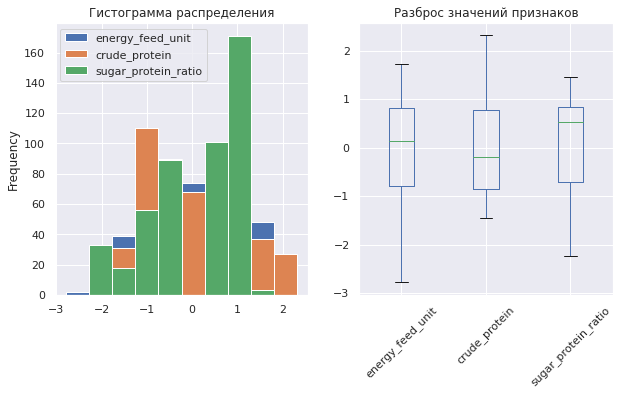

In [58]:
# гистограмма частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Данные отмасштабированы и находятся в диапазоне между 2 и -3.

In [59]:
# инициализация модели линейной регрессии
model_lr = LinearRegression()

# обучение модели на тренировочных данных
model_lr.fit(X_train, y_train)

# предсказания модели на тестовых данных 
# сохраним результат в переменную predictions
predictions = model_lr.predict(X_test)

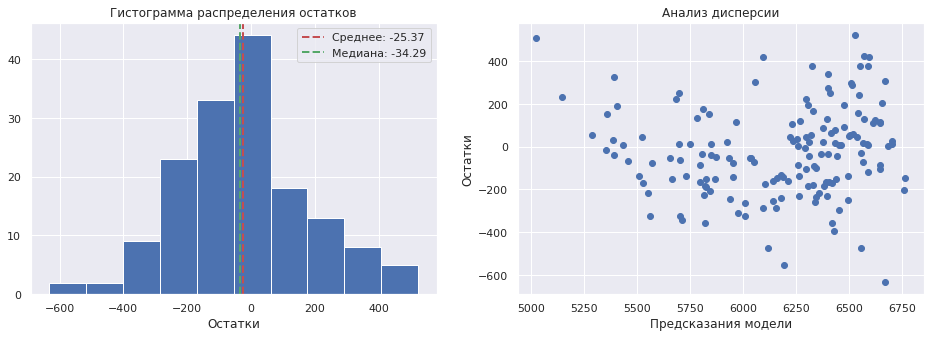

R2 LinearRegression = 0.7844078173416966
MSE = 43887.01500966053
MAE = 164.2419446347493
RMSE = 209.49227911706086


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
# расчет остатков
residuals = y_test - predictions

# Вычисление среднего значения остатков
mean_residuals = np.mean(residuals)
median_residuals = np.median(residuals)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].axvline(mean_residuals, color='r', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_residuals:.2f}')
axes[0].axvline(median_residuals, color='g', linestyle='dashed', linewidth=2, label=f'Медиана: {median_residuals:.2f}')
axes[0].legend()

axes[1].scatter(x = predictions, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

# рассчитываем значение R2 для линейной регрессии
r2 = r2_score(y_test, predictions)

# рассчитываем MSE
mse = mean_squared_error(y_test, predictions)

# рассчитываем RMSE
rmse = mean_squared_error(y_test, predictions, squared=False) 

# рассчитываем MAE
mae = mean_absolute_error(y_test, predictions)

# выведем полученные значения метрик
print("R2 LinearRegression =", r2)
print("MSE =", mse)
print("MAE =", mae)
print("RMSE =", rmse)

*Вывод:* метрика R2 равна 0.78, обученная модель недостаточно хорошо предсказывает удой молока. Также остатки распределены не равномерно. График надпоминает кривую дугу, что говорит о неравномерности. Среднее гистограммы достаточно близко к нулю, это значит, что среднее значение остатков мало.

Обучение второй модели.

In [61]:
# преобразование сахаро-протеинового соотношения и жирности молока в бинарный признак
ferma_main['sugar_protein_ratio_categor'] = ferma_main['sugar_protein_ratio'].apply(lambda x: '1 класс' if x <= 0.91 else '2 класс')

Так как на диаграмме сахаро-протеинового соотношения четко просматриквались два кластера. Было принято решение данный признак сделать бинарным, используя границу между кластерами. Была визуально выбрана граница равная 0.91.

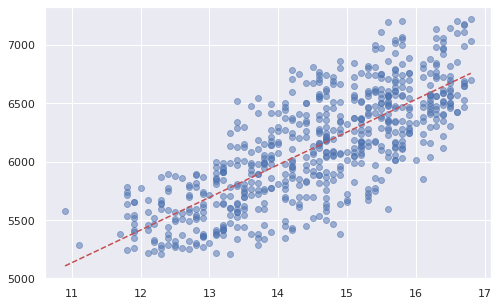

In [62]:
plt.figure(figsize=(8, 5))
plt.scatter(ferma_main['energy_feed_unit'], ferma_main['milk_yield'], color ='b', alpha=0.5)
# Добавление полиномиальной линии тренда
degree = 1  # Степень полинома
z = np.polyfit(ferma_main['energy_feed_unit'], ferma_main['milk_yield'], degree)  # Полиномиальная регрессия
p = np.poly1d(z)
x_fit = np.linspace(min(ferma_main['energy_feed_unit']), max(ferma_main['energy_feed_unit']), 100)  # Создание диапазона значений для x
plt.plot(x_fit, p(x_fit), "r--")  # Линия тренда (красная пунктирная линия)
plt.show()

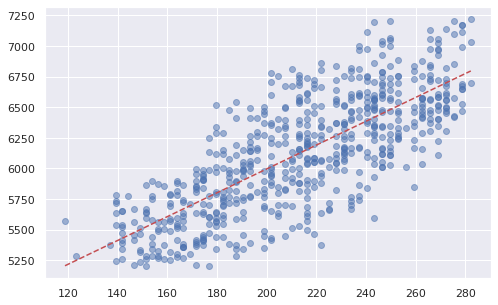

In [63]:
ferma_main['energy_feed_unit_squared'] = ferma_main['energy_feed_unit']**2
plt.figure(figsize=(8, 5))
plt.scatter(ferma_main['energy_feed_unit_squared'], ferma_main['milk_yield'], color ='b', alpha=0.5)
# Добавление полиномиальной линии тренда
degree = 1  # Степень полинома
z = np.polyfit(ferma_main['energy_feed_unit_squared'], ferma_main['milk_yield'], degree)  # Полиномиальная регрессия
p = np.poly1d(z)
x_fit = np.linspace(min(ferma_main['energy_feed_unit_squared']), max(ferma_main['energy_feed_unit_squared']), 100)  # Создание диапазона значений для x
plt.plot(x_fit, p(x_fit), "r--")  # Линия тренда (красная пунктирная линия)
plt.show()

Так как данные ЭКЕ визуально не распределены равномерно вдоль прямой (точки образуют небольшую дугу). Поэтому было принято решение возвести данные признак в квадрат. После возведения в квадрат точки вдоль прямой распределены равномернее, лучше просматривается корреляция между признаками.

In [64]:
X_2 = ferma_main[['energy_feed_unit_squared', 'crude_protein', 'sugar_protein_ratio_categor', 'breed', 'breed_dad_bull',\
                      'type_of_pasture', 'age']]
y_2 = ferma_main['milk_yield']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
X_2,
y_2,
random_state = RANDOM_STATE)

In [65]:
# кодирование категориального признака
encoder  = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names_2 = ['age', 'sugar_protein_ratio_categor', 'breed', 'breed_dad_bull', 'type_of_pasture']

# обучение и преобразование категориального признака из тренировочной выборки 
X_train_ohe_2 = encoder.fit_transform(X_train_2[cat_col_names_2])

# обучение и преобразование категориального признака из тестовой выборки 
X_test_ohe_2 = encoder.transform(X_test_2[cat_col_names_2])

# сохранение в переменной encoder_col_names названия новых столбцов 
encoder_col_names_2 = encoder.get_feature_names_out()
print(len(X_train_ohe_2))

471


In [66]:
num_col_names_2 = ['energy_feed_unit_squared', 'crude_protein']

# выбор метода масштабирования
scaler = StandardScaler()

# масштабирование тренировочной выборки
X_train_scaled_2 = scaler.fit_transform(X_train_2[num_col_names_2])

# масштабирование тестовой выборки
X_test_scaled_2 = scaler.transform(X_test_2[num_col_names_2])

In [67]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=encoder_col_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=encoder_col_names_2)

X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns=num_col_names_2)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns=num_col_names_2)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)

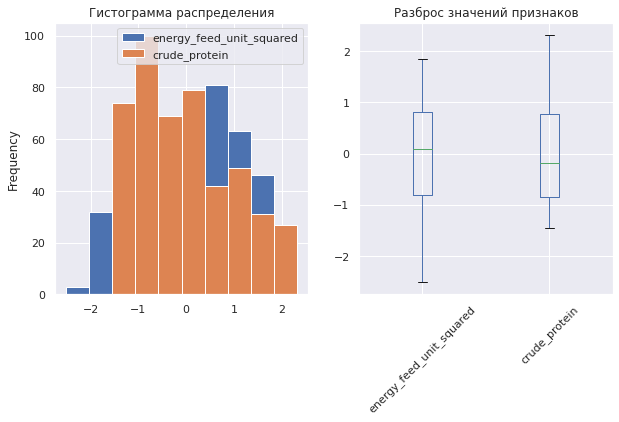

In [68]:
# гистограмма частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train_2[num_col_names_2].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_2[num_col_names_2].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [69]:
# инициализация модели линейной регрессии
model_lr_2 = LinearRegression()

# обучение модели на тренировочных данных
model_lr_2.fit(X_train_2, y_train_2)

# получение предсказания модели на тестовых данных 
# сохранение результат в переменную predictions
predictions_2 = model_lr_2.predict(X_test_2)

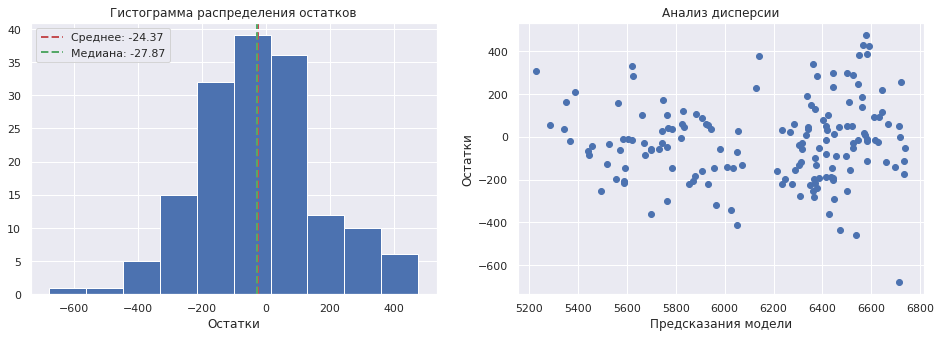

R2 LinearRegression = 0.8180879926867503
MSE = 37030.91131113694
MAE = 149.03965222364602
RMSE = 192.4341739690145


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [70]:
# расчет остатков
residuals_2 = y_test_2 - predictions_2

# Вычисление среднего значения остатков и медианного значения
mean_residuals_2 = np.mean(residuals_2)
median_residuals_2 = np.median(residuals_2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
axes[0].hist(residuals_2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].axvline(mean_residuals_2, color='r', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_residuals_2:.2f}')
axes[0].axvline(median_residuals_2, color='g', linestyle='dashed', linewidth=2, label=f'Медиана: {median_residuals_2:.2f}')
axes[0].legend()

axes[1].scatter(x = predictions_2, y = residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

# рассчитываем значения R2 для линейной регрессии
r2 = r2_score(y_test_2, predictions_2)

# рассчитываем MSE
mse = mean_squared_error(y_test_2, predictions_2)

# рассчитываем RMSE
rmse = mean_squared_error(y_test_2, predictions_2, squared=False) 

# рассчитываем MAE
mae = mean_absolute_error(y_test_2, predictions_2)

# выведем полученные значения метрик
print("R2 LinearRegression =", r2)
print("MSE =", mse)
print("MAE =", mae)
print("RMSE =", rmse)

*Вывод:* метрика R2 равна 0.81, обученная модель неплохо предсказывает удой молока, показатели всех метрик улучшились, но остатки распределены не равномерно. Судя по графику распределение остатков стало ещё хуже, чем в прошлой модели. Среднее в гистограмме также достаточно близко находится к нулю.

Обучение третьей модели.

In [71]:
#добавим новый признак - имя папы быка
merged_ferma_main = pd.merge(ferma_main, ferma_dad, on='id', how='left')

display(merged_ferma_main.head())

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,type_of_pasture,breed_dad_bull,fat_content,protein,taste_milk,age,sugar_protein_ratio_categor,fat_content_categor,energy_feed_unit_squared,name_dad
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,1 класс,1 класс,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,1 класс,1 класс,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,1 класс,1 класс,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,1 класс,0 класс,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,1 класс,2 класс,163.84,Барин


In [72]:
X_3 = merged_ferma_main[['energy_feed_unit_squared', 'crude_protein', 'sugar_protein_ratio_categor', 'breed', 'breed_dad_bull',\
                         'type_of_pasture', 'age', 'name_dad']]

y_3 = merged_ferma_main['milk_yield']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
X_3,
y_3,
random_state = RANDOM_STATE)

In [73]:
# кодирование категориального признака
encoder  = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names_3 = ['age', 'sugar_protein_ratio_categor', 'breed', 'breed_dad_bull', 'type_of_pasture', 'name_dad']

# обучение и преобразование категориального признака из тренировочной выборки 
X_train_ohe_3 = encoder.fit_transform(X_train_3[cat_col_names_3])

# обучение и преобразование категориального признака из тестовой выборки 
X_test_ohe_3 = encoder.transform(X_test_3[cat_col_names_3])

# сохранение в переменной encoder_col_names названия новых столбцов 
encoder_col_names_3 = encoder.get_feature_names_out()

In [74]:
num_col_names_3 = ['energy_feed_unit_squared', 'crude_protein']

# выбор метода масштабирования
scaler = StandardScaler()

# масштабирование тренировочной выборки
X_train_scaled_3 = scaler.fit_transform(X_train_3[num_col_names_3])

# масштабирование тестовой выборки
X_test_scaled_3 = scaler.transform(X_test_3[num_col_names_3])

In [75]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=encoder_col_names_3)

X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns=num_col_names_3)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns=num_col_names_3)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

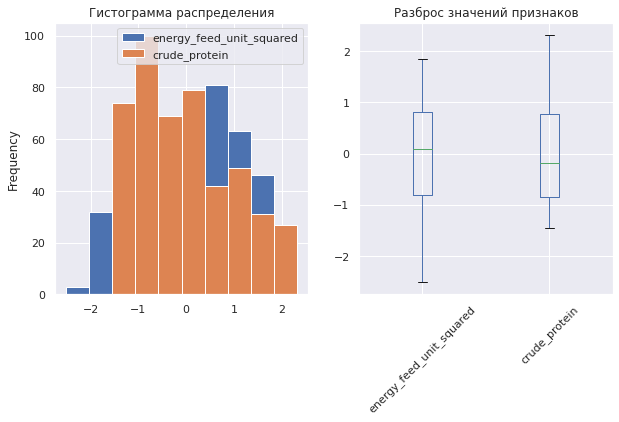

In [76]:
# гистограмма частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train_3[num_col_names_3].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_3[num_col_names_3].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [77]:
# инициализация модели линейной регрессии
model_lr_3 = LinearRegression()

# обучение модели на тренировочных данных
model_lr_3.fit(X_train_3, y_train_3)

# получение предсказания модели на тестовых данных 
# сохранение результат в переменную predictions_3
predictions_3 = model_lr_3.predict(X_test_3)

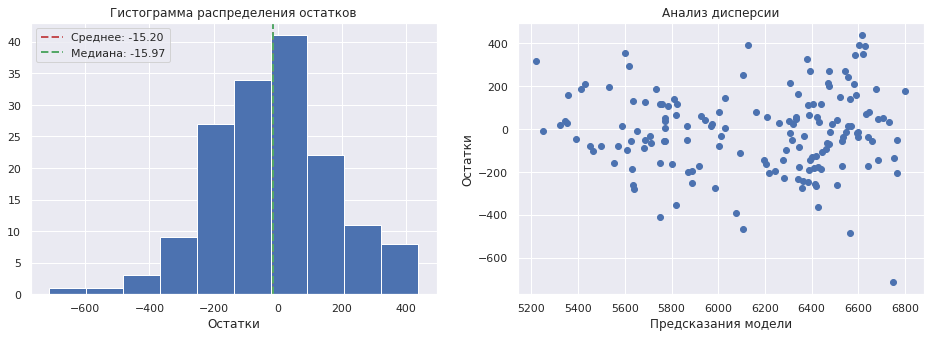

R2 LinearRegression = 0.8247542745210404
MSE = 35673.889886181976
MAE = 146.16302445362322
RMSE = 188.8753289505593


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
# расчет остатков
residuals_3 = y_test_3 - predictions_3

# Вычисление среднего значения остатков
mean_residuals_3 = np.mean(residuals_3)
median_residuals_3 = np.median(residuals_3)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
axes[0].hist(residuals_3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].axvline(mean_residuals_3, color='r', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_residuals_3:.2f}')
axes[0].axvline(median_residuals_3, color='g', linestyle='dashed', linewidth=2, label=f'Медиана: {median_residuals_3:.2f}')
axes[0].legend()

axes[1].scatter(x = predictions_3, y = residuals_3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

# рассчитываем значения R2 для линейной регрессии
r2 = r2_score(y_test_3, predictions_3)

# рассчитываем MSE
mse = mean_squared_error(y_test_3, predictions_3)

# рассчитываем RMSE
rmse = mean_squared_error(y_test_3, predictions_3, squared=False) 

# рассчитываем MAE
mae = mean_absolute_error(y_test_3, predictions_3)

# выведем полученные значения метрик
print("R2 LinearRegression =", r2)
print("MSE =", mse)
print("MAE =", mae)
print("RMSE =", rmse)

*Вывод:* метрика R2 равна 0.82, обученная модель имеет самые лучшие значения метрик. Судя по графику распределение остатков выглядит лучше, чем у остальных моделей. Среднее в гистограмме также достаточно близко находится к нулю.

In [79]:
q25 = np.quantile(predictions_3, 0.25)
q75 = np.quantile(predictions_3, 0.75)
print(f'25th percentile: {q25}')
print(f'75th percentile: {q75}')

25th percentile: 5773.772717198775
75th percentile: 6476.967702524775


Будем считать лучшей 3 модель. Доверительный интервал для данной модели 5777.835843105649 - 6443.38986079134.

Добавим недостающие признаки в датасет cow_buy.

In [80]:
# добавление ЭКЕ (Энергетической кормовой единицы)
cow_buy['energy_feed_unit'] = ferma_main['energy_feed_unit'].mean() * 1.05

# добавление Сырого протеина, г
cow_buy['crude_protein'] = ferma_main['crude_protein'].mean() * 1.05

# добавление СПО (Сахаро-протеинового соотношения)
cow_buy['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].mean() * 1.05

In [81]:
# преобразование сахаро-протеинового соотношения в бинарный признак
cow_buy['sugar_protein_ratio_categor'] = cow_buy['sugar_protein_ratio'].apply(lambda x: '1 класс' if x <= 0.91 else '2 класс')
# возведение ЭКЕ в квадрат
cow_buy['energy_feed_unit_squared'] = cow_buy['energy_feed_unit']**2

In [82]:
cow_buy.head()

,breed,type_of_pasture,breed_dad_bull,name_dad,current_fat_content,сurrent_protein_level,age,energy_feed_unit,crude_protein,sugar_protein_ratio,sugar_protein_ratio_categor,fat_content_categor,energy_feed_unit_squared
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,2 класс,0 класс,233.361138
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138


In [83]:
X_pred = cow_buy[['energy_feed_unit_squared', 'crude_protein', 'sugar_protein_ratio_categor', 'breed', 'breed_dad_bull',\
                         'type_of_pasture', 'age', 'name_dad']]
X_pred = X_pred.rename(columns={'current_fat_content': 'fat_content', 'сurrent_protein_level': 'protein'})

In [84]:
# список всех категориальных признаков из тренировочной выборки
cat_col_names_pred = ['age', 'sugar_protein_ratio_categor', 'breed', 'breed_dad_bull', 'type_of_pasture', 'name_dad']

# обучение и преобразование категориального признака из тренировочной выборки 
X_pred_ohe = encoder.transform(X_pred[cat_col_names_pred])

# сохранение в переменной encoder_col_names названия новых столбцов 
encoder_col_names_pred = encoder.get_feature_names_out()

In [85]:
num_col_names_pred = ['energy_feed_unit_squared', 'crude_protein']

# обучение и преобразование категориального признака из тренировочной выборки 
X_pred_scaled = scaler.transform(X_pred[num_col_names_pred])

# сохранение в переменной encoder_col_names названия новых столбцов 
encoder_col_names_pred = encoder.get_feature_names_out()

In [86]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_pred_ohe = pd.DataFrame(X_pred_ohe, columns=encoder_col_names_pred)

X_pred_scaled = pd.DataFrame(X_pred_scaled, columns=num_col_names_pred)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_pred = pd.concat([X_pred_ohe, X_pred_scaled], axis=1)
#X_pred.insert(1, 'sugar_protein_ratio_categor_2 класс', X_pred.pop('sugar_protein_ratio_categor_2 класс')) 
#X_pred = X_pred.rename(columns={'current_fat_content': 'fat_content', 'сurrent_protein_level': 'protein'})

In [87]:
predictions_result = model_lr_3.predict(X_pred)

In [88]:
cow_buy['milk_yeld'] = predictions_result

**Вывод**

- Было обучено 3 модели:
    - 1 модель обучалась на всех признаках и показала метрики недостаточные для использования в предсказаниях
    - 2 модель обучалась на преобразованных признаках (мы ушли от нелинейности ЭКЕ, СПО и жирности молока с помощью преобразования признаков в бинарные и с помощью возведения в квадрат в случае ЭКЕ). Результаты метрик стали лучше но было куда улучшать.
    - 3 модель обучалась на признаках для 2 модели + использовался признак пап быков, данная модель показала лучшие результаты. Было принято решение использовать её.

По результатам прогнозирования почти все коровы из стада способны давать удой более 6000 кг в год.

## 6. Обучение модели логистической регрессии
<a id='section_6'></a>

In [89]:
merged_ferma_main['taste_milk'] = merged_ferma_main['taste_milk'].apply(lambda x: 1 if x == 'вкусно' else 0)

In [90]:
merged_ferma_main.head()

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,type_of_pasture,breed_dad_bull,fat_content,protein,taste_milk,age,sugar_protein_ratio_categor,fat_content_categor,energy_feed_unit_squared,name_dad
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,1,более_2_лет,1 класс,1 класс,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,1,менее_2_лет,1 класс,1 класс,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,0,более_2_лет,1 класс,1 класс,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,0,более_2_лет,1 класс,0 класс,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,1,менее_2_лет,1 класс,2 класс,163.84,Барин


In [91]:
# разбиваем признаки на входные и целевой
X_log = merged_ferma_main[['energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'breed','type_of_pasture',\
                           'fat_content', 'protein', 'age', 'breed_dad_bull']]
y_log = merged_ferma_main['taste_milk']

# разбиваем данные на тренировочные и тестовые
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(
    X_log, 
    y_log,
    random_state=RANDOM_STATE
)


In [92]:
# кодирование категориального признака
encoder  = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# список всех категориальных признаков из тренировочной выборки

cat_col_names_log = ['age', 'breed', 'type_of_pasture', 'breed_dad_bull']

# обучение и преобразование категориального признака из тренировочной выборки 
X_log_train_ohe = encoder.fit_transform(X_log_train[cat_col_names_log])

# обучение и преобразование категориального признака из тестовой выборки 
X_log_test_ohe = encoder.transform(X_log_test[cat_col_names_log])

# сохранение в переменной encoder_col_names названия новых столбцов 
encoder_col_names_log = encoder.get_feature_names_out()

In [93]:
num_col_names_log = ['energy_feed_unit', 'crude_protein',  'protein', 'fat_content', 'sugar_protein_ratio']

# выбор метода масштабирования
scaler = StandardScaler()

# масштабирование тренировочной выборки
X_log_train_scaled = scaler.fit_transform(X_log_train[num_col_names_log])

# масштабирование тестовой выборки
X_log_test_scaled = scaler.transform(X_log_test[num_col_names_log])

In [94]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_log_train_ohe = pd.DataFrame(X_log_train_ohe, columns=encoder_col_names_log)
X_log_test_ohe = pd.DataFrame(X_log_test_ohe, columns=encoder_col_names_log)

X_log_train_scaled = pd.DataFrame(X_log_train_scaled, columns=num_col_names_log)
X_log_test_scaled = pd.DataFrame(X_log_test_scaled, columns=num_col_names_log)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_log_train = pd.concat([X_log_train_ohe, X_log_train_scaled], axis=1)
X_log_test = pd.concat([X_log_test_ohe, X_log_test_scaled], axis=1)

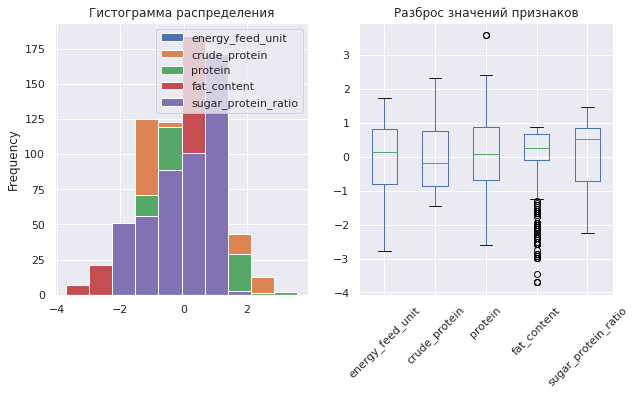

In [95]:
# гистограмма частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_log_train[num_col_names_log].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_log_train[num_col_names_log].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [96]:
clf = LogisticRegression()

clf = clf.fit(X_log_train, y_log_train)

# получаем прогнозные метки классов
y_log_pred = clf.predict(X_log_test) 

Accuracy =  0.6050955414012739
Precision =  0.6065573770491803
Recall =  0.8409090909090909


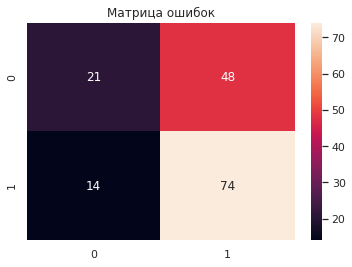

In [97]:
acc = accuracy_score(y_log_test, y_log_pred)  
precision = precision_score(y_log_test, y_log_pred) 
recall = recall_score(y_log_test, y_log_pred)       

sns.heatmap(confusion_matrix(y_log_test, y_log_pred), annot=True, fmt='d');
plt.title('Матрица ошибок')
print('Accuracy = ',acc)
print('Precision = ',precision)
print('Recall = ',recall)

Критичнее при покупке коров ошибка 1 рода. В этом случае модель не вкусное молоко предсказывает, как вкусное.
Так как нам необходио исключить ошибку первого рода, нам важен показатель precision (=0.84). 
В данный момент модель допускает ошибку первого рода 48 раз.
Необходимо свести ошибку первого рода к нулю, для этого попробуем разные пороги принадлежности к классам.

In [98]:
y_proba = clf.predict_proba(X_log_test)[:,1]

data = pd.DataFrame(zip(y_log_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

thresholds = [round(i,3) for i in np.linspace(0.1,1,num = 1000,endpoint=False)]

In [99]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if i <= x else 0 )

# выведем 5 случайных строк
display(data.head())

,y_valid,y_proba,y_pred_0.1,y_pred_0.101,y_pred_0.102,y_pred_0.103,y_pred_0.104,y_pred_0.105,y_pred_0.106,y_pred_0.107,...,y_pred_0.99,y_pred_0.991,y_pred_0.992,y_pred_0.993,y_pred_0.994,y_pred_0.995,y_pred_0.996,y_pred_0.997,y_pred_0.998,y_pred_0.999
33,0,0.848358,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
17,1,0.827956,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
85,1,0.819905,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
66,1,0.809939,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
95,1,0.790450,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [100]:
for i in thresholds:
    if confusion_matrix(y_log_test, data['y_pred_'+str(i)])[0][1] == 0:
        print('Порог = ',i ,'Precision = ', round(precision_score(y_log_test, data['y_pred_'+str(i)]), 2), 'TP =', confusion_matrix(y_log_test, data['y_pred_'+str(i)])[1][1])
        threshold_value = i
        break

Порог =  0.81 Precision =  1.0 TP = 3


Accuracy =  0.4585987261146497
Precision =  1.0
Recall =  0.03409090909090909


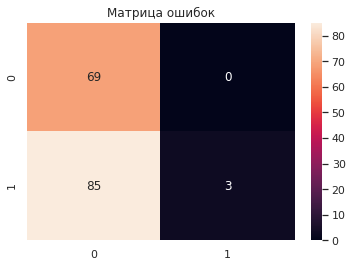

In [101]:
acc = accuracy_score(y_log_test, data['y_pred_0.81'])
precision = precision_score(y_log_test, data['y_pred_0.81'])
recall = recall_score(y_log_test, data['y_pred_0.81'])

sns.heatmap(confusion_matrix(y_log_test, data['y_pred_0.81']), annot=True, fmt='d');
plt.title('Матрица ошибок')
print('Accuracy = ',acc)
print('Precision = ',precision)
print('Recall = ',recall)

Таким образом, был найден порог принадлежности к классам равный 0.85. Precision приняло значение 1.0. Мы полностью избавились от ошибки 1 рода, что и требовалось. Теперь можно перейти к прогнозированию вкуса молока для бурёнок предназначенных для покупки.

In [102]:
cow_buy.head()

,breed,type_of_pasture,breed_dad_bull,name_dad,current_fat_content,сurrent_protein_level,age,energy_feed_unit,crude_protein,sugar_protein_ratio,sugar_protein_ratio_categor,fat_content_categor,energy_feed_unit_squared,milk_yeld
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6609.919297
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6378.711028
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6283.999775
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,2 класс,0 класс,233.361138,6593.089377
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6542.146066


In [103]:
# разбиваем признаки на входные и целевой
X_pred_log = cow_buy[['energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'breed', 'type_of_pasture',\
                      'current_fat_content', 'сurrent_protein_level', 'age', 'breed_dad_bull']]

X_pred_log = X_pred_log.rename(columns={'current_fat_content': 'fat_content', 'сurrent_protein_level': 'protein'})

# кодирование категориального признака
encoder_2  = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names_pred_log = ['age', 'breed', 'type_of_pasture', 'breed_dad_bull']

# обучение и преобразование категориального признака из тренировочной выборки 
X_pred_log_ohe = encoder.transform(X_pred_log[cat_col_names_pred_log])

# сохранение в переменной encoder_col_names названия новых столбцов 
encoder_col_names_pred = encoder.get_feature_names_out()

num_col_names_pred_log = ['energy_feed_unit', 'crude_protein', 'protein', 'fat_content', 'sugar_protein_ratio']

# масштабирование тренировочной выборки
X_pred_log_scaled = scaler.transform(X_pred_log[num_col_names_pred_log])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_pred_log_ohe = pd.DataFrame(X_pred_log_ohe, columns=encoder_col_names_pred)

X_pred_log_scaled = pd.DataFrame(X_pred_log_scaled, columns=num_col_names_pred_log)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_pred_log = pd.concat([X_pred_log_ohe, X_pred_log_scaled], axis=1)

In [104]:
y_log_pred_ver = clf.predict_proba(X_pred_log)[:,1]
y_log_pred_ver

array([0.75793854, 0.76561398, 0.65589494, 0.48234084, 0.61409884,
       0.17933165, 0.75793854, 0.74239269, 0.65589494, 0.82935136,
       0.29178988, 0.60541079, 0.13533759, 0.77288789, 0.65589494,
       0.57868334, 0.80868894, 0.16234744, 0.57088531, 0.61409884])

In [105]:
cow_buy['y_log_pred'] = y_log_pred_ver

cow_buy['taste_milk'] = cow_buy['y_log_pred'].apply(lambda x: 'вкусно' if x > threshold_value else 'не вкусно')

cow_buy = cow_buy.sort_values(by = ['y_log_pred'], ascending = False)
cow_buy = cow_buy.drop(columns='y_log_pred')

Таким образом, была отобрана лучшая модель для нашей задачи и спрогнозирован вкус молока для бурёнок.

## 7. Итоговые выводы
<a id='section_7'></a>

In [106]:
cow_buy

,breed,type_of_pasture,breed_dad_bull,name_dad,current_fat_content,сurrent_protein_level,age,energy_feed_unit,crude_protein,sugar_protein_ratio,sugar_protein_ratio_categor,fat_content_categor,energy_feed_unit_squared,milk_yeld,taste_milk
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,2 класс,0 класс,233.361138,6400.540668,вкусно
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,2 класс,2 класс,233.361138,6344.707860,не вкусно
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,2019.947532,0.958744,2 класс,0 класс,233.361138,6127.474742,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6378.711028,не вкусно
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6609.919297,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6609.919297,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6571.259737,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6283.999775,не вкусно
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6283.999775,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,2 класс,1 класс,233.361138,6283.999775,не вкусно


In [107]:
cow_buy[(cow_buy['taste_milk'] == 'вкусно') & (cow_buy['milk_yeld'] > 6000)]

,breed,type_of_pasture,breed_dad_bull,name_dad,current_fat_content,сurrent_protein_level,age,energy_feed_unit,crude_protein,sugar_protein_ratio,sugar_protein_ratio_categor,fat_content_categor,energy_feed_unit_squared,milk_yeld,taste_milk
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.4,3.079,менее_2_лет,15.276162,2019.947532,0.958744,2 класс,0 класс,233.361138,6400.540668,вкусно


### **Итоговый вывод**
- В данных отсутствуют пропуски;
- Были удалены явные дупликаты в датафреймах ferma_main, cow_buy;
- Были обнаружены и устранены неявные дупликаты в датафрейме ferma_main в столбцах 'type_of_pasture', 'breed_dad_bull';
- В датафрейме ferma_main в столбцах 'energy_feed_unit', 'sugar_protein_ratio', 'fat_content', 'protein' преобразовали тип данных на float;
- В датафрейме cow_buy в столбцах 'current_fat_content', 'сurrent_protein_level' преобразовали тип данных на float;
- Был проведён исследовательский анализ по датафрейму ferma_main. В результате:
- Был обнаружен и удален выброс в столбце 'milk_yield';
- Были сделаны следующие выводы по графикам: 
  - Наибольшее количество значений удоя коров приходится на интервал 6500-6750 кг, где количество наблюдений достигает примерно 35;
  - Судя по гистограмме распределения данных энергетической кормовой единицы пик значений приходится на интервал между 14 и 15;
  - Судя по гистограмме распределения данных сырого протеина корма коровы пиковое значение приходится на интервал 1700-1800;
  - Судя по гистограмме расределения данных сахаро-протеинового соотношения есть 3 вида корма, используемые для питания коров. Первый вид имеет сахаро-протеиновое соотношение в районе 0,84-0,865, второй вид имеет соотношение от 0,88 до 0,905, а третий вид имеет соотношение от 0,93 до 0,96;
  - Судя по гистограмме жирность молока варьируется от 3 до 3.7%. Чаще всего молоко имеет жирность 3.6 - 3.7%;
  - Гистограмма с распределением данных содержания белка в молоке имеет форму нормального распределения с пиком на уровне 3.076;
  - Все категориальные признаки имеют соотношение примерно равное 1:1, кроме возраста (коров в возрасте меньше 2 лет значительно меньше, чем коров старше 2 лет);
- Был проведен исследовательский анализ по датафрейму cow_buy. В результате выбросы и аномальные значения не были обнаружены;
- Для обучения модели были выбраны следующие признаки: возраст коровы (если корове больше 2 лет удой увеличивается), сахаро-протеиновое соотношение корма, энергетическая кормовая единица корма, так как есть линейная связь и данные признаки правда могут влиять на количество удоя. Процент жирности молока хоть и имеет линейную связь с удоем молок, но вряд ли можно сказать, что жирность молока влияет на итоговый удой;
- Также стоит отметить, что диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориального признака возраста коров показывают, что корреляции почти нет при возрасте коров менее 2 лет, а у коров в возрасте более 2 лет корреляция есть;
- Между входными признаками отсутствует мультиколлинеарность (при значении коэффициента корреляции от 0.9 до 0.95 по модулю);

**Выводы по разработанным моделям и результатам предсказаний**
- Таким образов, с помощью обученных моделей была отобрана 1 подходящая корова, которую может купить фермер с минимальным риском для себя. Судя по рпедсказаниям у этой коровы удой будет больше 6000 кг в год и молоко будет вкусным;
- Модель линейной регерессии улучшалась засчёт ухода от нелинейности между входными признаками и целевым признаком и засчёт добавления новых признаков;
- Модель логистической регерессии улучшалась засчёт поиска порогового значения, которое увеличет чувствительность модели и поможет избавиться от ошибок 1 рода, что было необходимо в нашей задаче;